# RETROGRADE

In [1]:
import scipy.special
from matplotlib import pyplot
import numpy

from discohisto.stats import poisson_log_minus_max

In [2]:
pyplot.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "font.size": 10,
        "figure.facecolor": "w",
    }
)

In [5]:
def plot_r(ns, point_to_weight, range_):
    x = numpy.linspace(*range_, 513)
    
    points = list(point_to_weight)
    weights = numpy.array(list(point_to_weight.values()))
    log_weights = numpy.log(weights / weights.sum())
    
    def logl(n, x):
        return _logmeanexp([
            poisson_log_minus_max(n, x + point) + log_weight
            for point, log_weight in zip(points, log_weights)
        ])
    
    colors = ["xkcd:blue", "xkcd:red", "xkcd:orange", "xkcd:yellow", "xkcd:lime green"]

    figure, axis = pyplot.subplots(
        dpi=400,
        figsize=numpy.array([4, 3]) * 0.7,
        gridspec_kw={
            "top": 0.99,
            "right": 0.97,
            "bottom": 0.2,
            "left": 0.2,
        },
    )
    
    for n_i, color_i in zip(ns, colors):
        axis.plot(x, logl(n_i, x) - logl(n_i, 0), color_i)
    
    
    axis.axhline(-3, c="k", ls="--", alpha=0.5)
    
    axis.set_ylim(-6.5, 0.5)
    axis.set_xlim(*range_)
    
    axis.set_xlabel(r"$\mu$")
    axis.set_ylabel(r"$\log R$")
    
    figure.savefig("wrong_move_example_plot_r.png")
    pyplot.show()
    pyplot.close(figure)
    

def _logmeanexp(x, axis=0):
    x = numpy.asarray(x)
    norm = numpy.log(x.shape[axis])
    return scipy.special.logsumexp(x, axis=axis) - norm

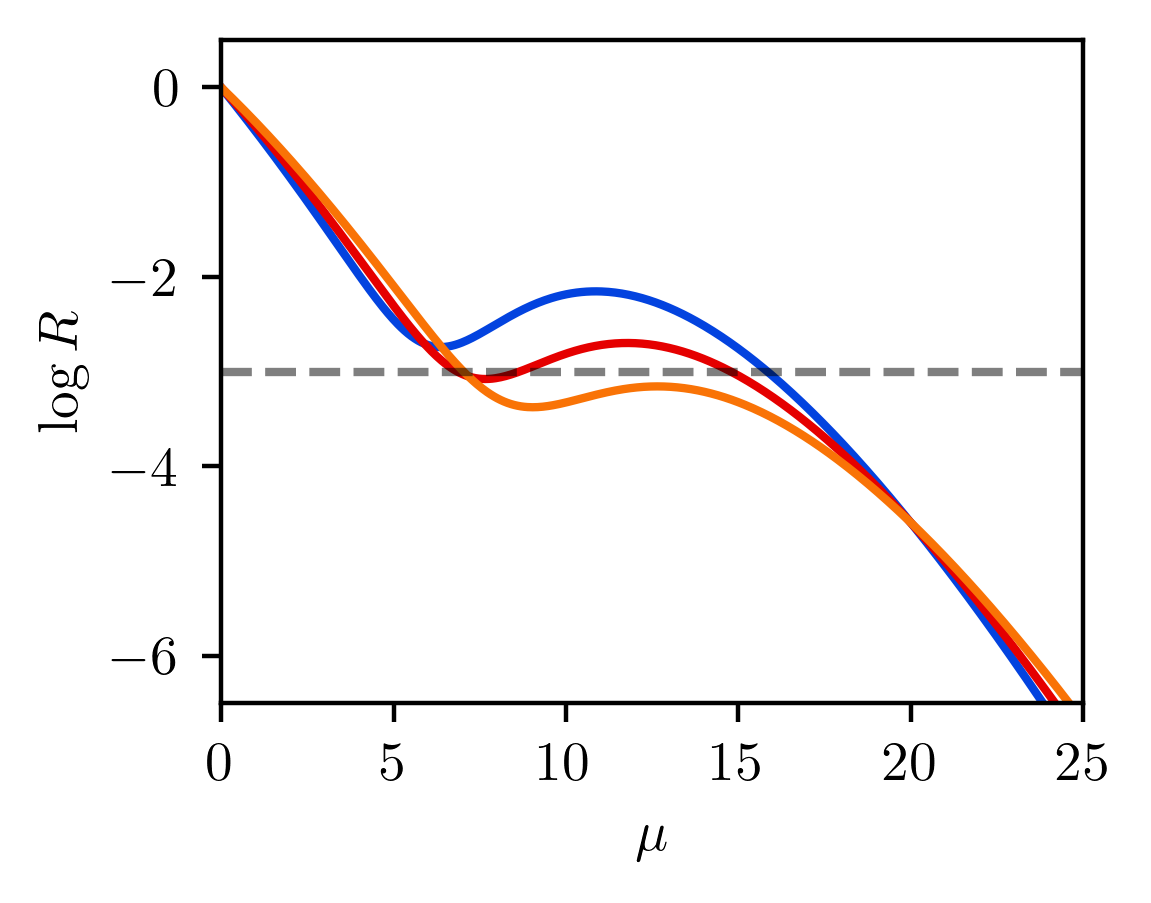

In [6]:
plot_r(
    [11, 12, 13],
    {0: 1, 20: 99},
    [0, 25],
)